https://pbpython.com/pandas-crosstab.html

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
pwd = os.getcwd()

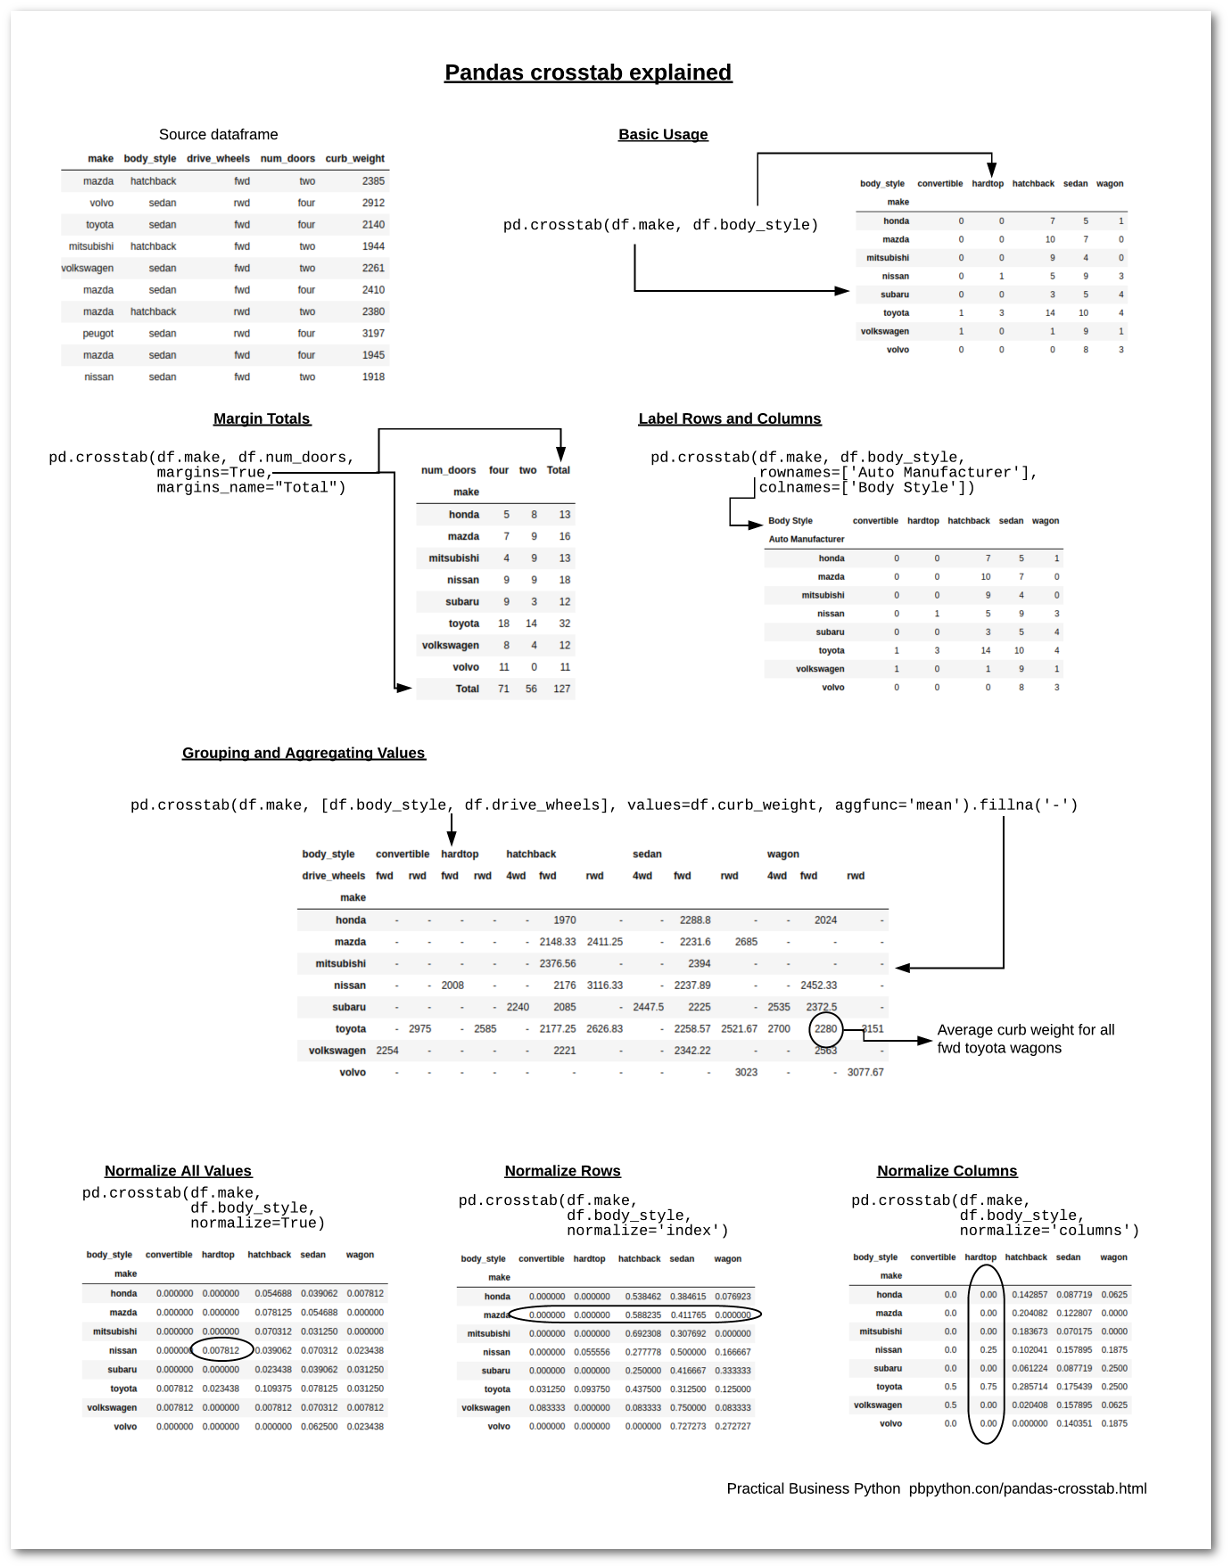

In [34]:
from IPython.display import Image
Image('https://pbpython.com/images/crosstab_cheatsheet.png')

In [3]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [4]:
dataset = pd.read_csv(pwd + '\\imports-85.data',header=None,names=headers)
dataset

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<AxesSubplot:xlabel='body_style-drive_wheels', ylabel='make'>

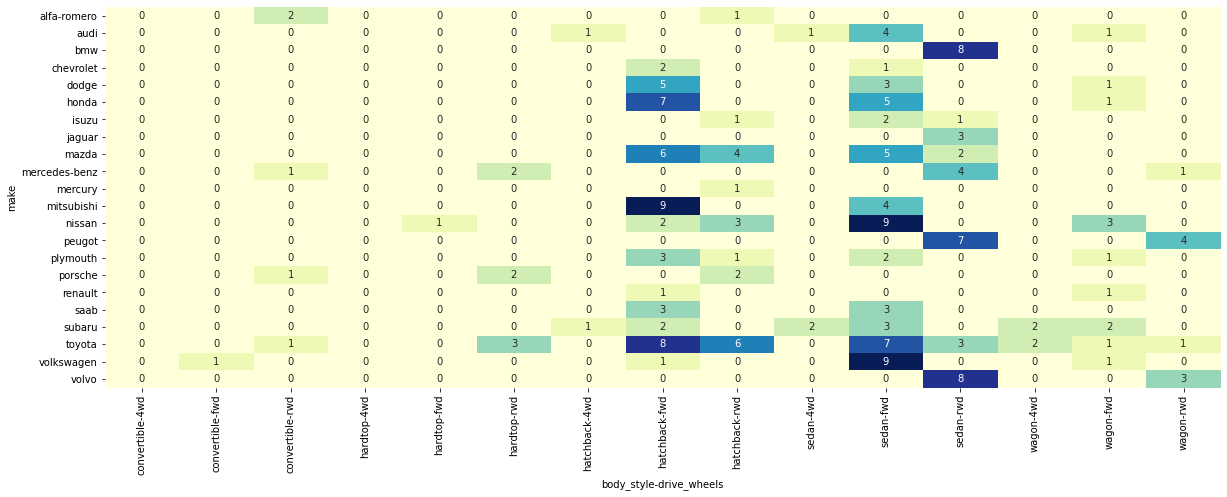

In [48]:
reg = pd.crosstab(dataset['make'],[dataset['body_style'],dataset['drive_wheels']],dropna=False)
plt.figure(figsize=(20,7))
sns.heatmap(reg,cmap="YlGnBu", annot=True, cbar=False)

In [30]:
crt = pd.crosstab(dataset['make'],dataset['body_style'],values=dataset['curb_weight'],aggfunc='mean',margins=True,normalize='columns')
crt.fillna(0)

body_style,convertible,hardtop,hatchback,sedan,wagon,All
make,,,,,,
alfa-romero,0.178657,0.000000,0.067432,0.000000,0.000000,0.045481
audi,0.000000,0.000000,0.072926,0.058222,0.089545,0.048256
bmw,0.000000,0.000000,0.000000,0.062713,0.000000,0.050473
chevrolet,0.000000,0.000000,0.040153,0.040868,0.000000,0.030273
dodge,0.000000,0.000000,0.050917,0.044022,0.076844,0.037067
honda,0.000000,0.000000,0.047057,0.048999,0.061354,0.036127
isuzu,0.000000,0.000000,0.065306,0.043673,0.000000,0.038138
jaguar,0.000000,0.000000,0.000000,0.086218,0.000000,0.069391
mazda,0.000000,0.000000,0.053828,0.050548,0.000000,0.039591


<AxesSubplot:>

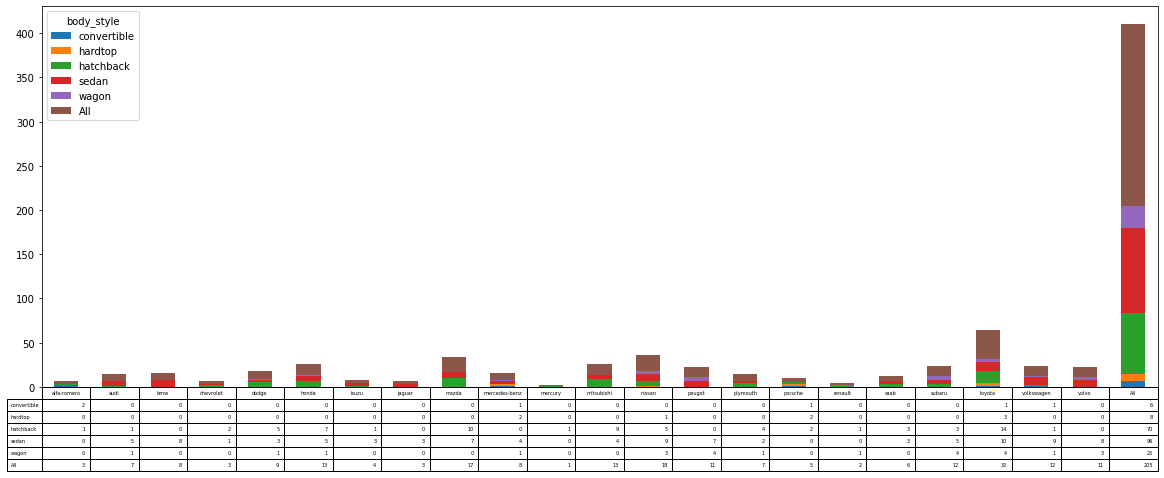

In [6]:
crt.plot(kind='bar',figsize=(20,7),stacked=True,table=True,xticks=[],xlabel='')

In [7]:
dataset.groupby('make').agg({'body_style':'describe'})

body_style                         
                   count unique          top freq
make                                             
alfa-romero            3      2  convertible    2
audi                   7      3        sedan    5
bmw                    8      1        sedan    8
chevrolet              3      2    hatchback    2
dodge                  9      3    hatchback    5
honda                 13      3    hatchback    7
isuzu                  4      2        sedan    3
jaguar                 3      1        sedan    3
mazda                 17      2    hatchback   10
mercedes-benz          8      4        sedan    4
mercury                1      1    hatchback    1
mitsubishi            13      2    hatchback    9
nissan                18      4        sedan    9
peugot                11      2        sedan    7
plymouth               7      3    hatchback    4
porsche                5      3      hardtop    2
renault                2      2        wagon    1
saab                   6      2        sedan    3
subaru                12      3        sedan    5
toyota                32      5    hatchback   14
volkswagen            12      4        sedan    9
volvo                 11      2        sedan    8

In [23]:
piv = pd.pivot_table(dataset,index='make',columns='body_style',values='curb_weight',aggfunc='mean',fill_value=0,margins=True)
piv

body_style,convertible,hardtop,hatchback,sedan,wagon,All
make,,,,,,
alfa-romero,2548.000000,0.000,2823.000000,0.000000,0.000000,2639.666667
audi,0.000000,0.000,3053.000000,2719.600000,2954.000000,2800.714286
bmw,0.000000,0.000,0.000000,2929.375000,0.000000,2929.375000
chevrolet,0.000000,0.000,1681.000000,1909.000000,0.000000,1757.000000
dodge,0.000000,0.000,2131.600000,2056.333333,2535.000000,2151.333333
honda,0.000000,0.000,1970.000000,2288.800000,2024.000000,2096.769231
isuzu,0.000000,0.000,2734.000000,2040.000000,0.000000,2213.500000
jaguar,0.000000,0.000,0.000000,4027.333333,0.000000,4027.333333
mazda,0.000000,0.000,2253.500000,2361.142857,0.000000,2297.823529
